In [42]:
# Nice plot using matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
# make text editable in Illustrator
plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['ps.fonttype'] = 42

# import altair
import altair as alt
alt.data_transformers.disable_max_rows()


DataTransformerRegistry.enable('default')

In [4]:

# Load ../Datasets/carfeatures.csv
df = pd.read_csv("../../Datasets/carfeatures.csv")
df.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [38]:
# Entry with highest Highway MPG
weirdEntry = df.loc[df['highway MPG'].idxmax()]
print(weirdEntry)
# probably a mistake
# remove it
df_filtered = df[df['highway MPG'] < 100]
# also removing electric cars
df_filtered = df_filtered[df_filtered['Engine Fuel Type'] != 'electric']

Make                                           Audi
Model                                            A6
Year                                           2017
Engine Fuel Type     premium unleaded (recommended)
Engine HP                                     252.0
Engine Cylinders                                4.0
Transmission Type                  AUTOMATED_MANUAL
Driven_Wheels                     front wheel drive
Number of Doors                                 4.0
Market Category                              Luxury
Vehicle Size                                Midsize
Vehicle Style                                 Sedan
highway MPG                                     354
city mpg                                         24
Popularity                                     3105
MSRP                                          51600
Name: 1119, dtype: object


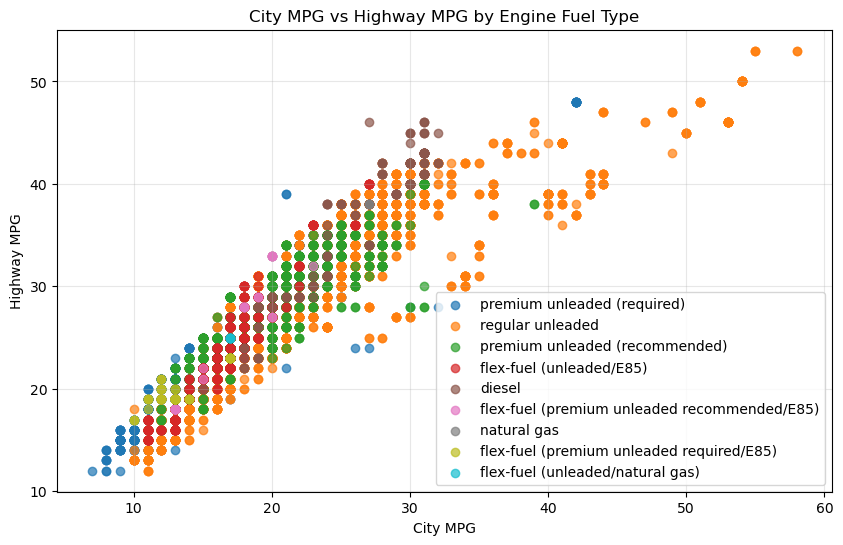

In [40]:
# Plot using matplotlib "highway MPG" vs "city MPG" and color by "Vehicle Size" with cat10
plt.figure(figsize=(10, 6))

colorProperty = "Engine Fuel Type"
# Get unique colorProperty
vehicle_sizes = df_filtered[colorProperty].dropna().unique()

# Create a color map
colors = plt.cm.tab10(np.linspace(0, 1, len(vehicle_sizes)))

# Plot each colorProperty category as a separate scatter plot
for i, size in enumerate(vehicle_sizes):
    mask = df_filtered[colorProperty] == size
    plt.scatter(df_filtered.loc[mask, 'city mpg'], df_filtered .loc[mask, 'highway MPG'], 
                color=colors[i], label=size, alpha=0.7)

plt.xlabel('City MPG')
plt.ylabel('Highway MPG')
plt.title(f'City MPG vs Highway MPG by {colorProperty}')
plt.legend()
plt.grid(alpha=0.3)
# save as pdf
plt.savefig("carfeatures.pdf")
plt.savefig("carfeatures.png")
plt.show()



In [47]:
# list of numeric features (get from data)
numeric_features = df.select_dtypes(include=['float64', 'int64']).columns.tolist()
# remove Year
numeric_features.remove('Year')
numeric_features

['Engine HP',
 'Engine Cylinders',
 'Number of Doors',
 'highway MPG',
 'city mpg',
 'Popularity',
 'MSRP']

In [58]:
import altair as alt
from altair import datum

df_iris = pd.read_csv("../../Datasets/Iris.csv")

chart = alt.Chart(df_iris).transform_window(
    index='count()'
).transform_fold(
    ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']
).transform_joinaggregate(
     min='min(value)',
     max='max(value)',
     groupby=['key']
).transform_calculate(
    minmax_value=(datum.value-datum.min)/(datum.max-datum.min),
    mid=(datum.min+datum.max)/2
).mark_line().encode(
    x='key:N',
    y='minmax_value:Q',
    color='Species:N',
    detail='index:N',
    opacity=alt.value(0.5)
).properties(width=500)
chart


alt.Chart(...)

In [59]:
# saving requires the vl-convert-python
!pip install vl-convert-python

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.9/26.9 MB 47.7 MB/s eta 0:00:00a 0:00:01


In [60]:

# save as pdf, png and svg
chart.save("iris.pdf")
chart.save("iris.png")
chart.save("iris.svg")